In [1]:
using CSV
using DataFrames

In [2]:
data = DataFrame(CSV.File("../data/sensor_data_200.txt"; 
        header=["data", "time", "ir", "lidar"]))

,data,time,ir,lidar
,Int64,Int64,Int64,Int64
1,20180122,95819,305,214
2,20180122,95822,299,211
3,20180122,95826,292,199
4,20180122,95829,321,208
5,20180122,95832,298,212
6,20180122,95835,327,212
7,20180122,95838,293,215
8,20180122,95840,309,218
9,20180122,95843,323,208


In [3]:
data[1:5, "lidar"]

5-element Array{Int64,1}:
 214
 211
 199
 208
 212

In [4]:
using PyPlot
using Statistics

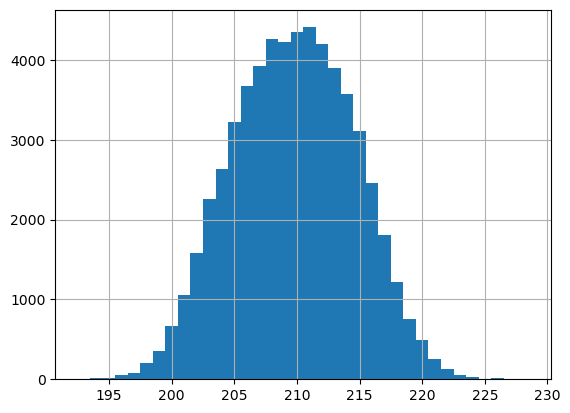

In [5]:
hist(data[:,"lidar"], bins= maximum(data.lidar)-minimum(data.lidar),align="left")
grid("on")

In [6]:
mean1 = sum(data.lidar)/length(data.lidar)
mean2 = mean(data.lidar)
print(mean1," ", mean2)

209.73713297619855 209.73713297619855

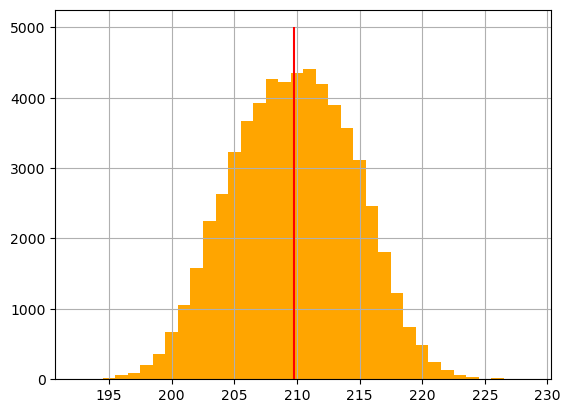

In [7]:
hist(data[:,"lidar"], bins= maximum(data.lidar)-minimum(data.lidar),
    align="left",color="orange")
vlines(mean1, ymin=0, ymax=5000, color="red")
grid("on")

In [8]:
zs = data.lidar
zs_mean = sum(zs)/length(zs)
diff_square = [(z-zs_mean)^2 for z in zs]

sampling_var = sum(diff_square)/length(zs)
unbiased_var = sum(diff_square)/(length(zs)-1)

println(sampling_var)
println(unbiased_var)

statistics_sampling_var = var(zs, corrected=false)
statistics_unbiased_var = var(zs)
println(statistics_sampling_var)
println(statistics_unbiased_var)

23.407709770274206
23.40810659855451
23.40770977027421
23.408106598554514


In [9]:
stddev1 = sqrt(sampling_var)
stddev2 = sqrt(unbiased_var)

statistics_stddev = std(data.lidar)

println(stddev1)
println(stddev2)
println(statistics_stddev)

4.838151482774615
4.83819249292073
4.83819249292073


In [10]:
using StatsBase

In [24]:
freqs_dict = countmap(data.lidar)

tmp_dict = Dict()
for (key, value) in freqs_dict
    tmp_dict[string(key)] = [value, value/length(data.lidar)]
end
freqs = DataFrame(tmp_dict)

,193,194,195,196,197,198,199
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,4.0,10.0,13.0,59.0,84.0,205.0,353.0
2,6.78104e-5,0.000169526,0.000220384,0.0010002,0.00142402,0.00347528,0.00598427


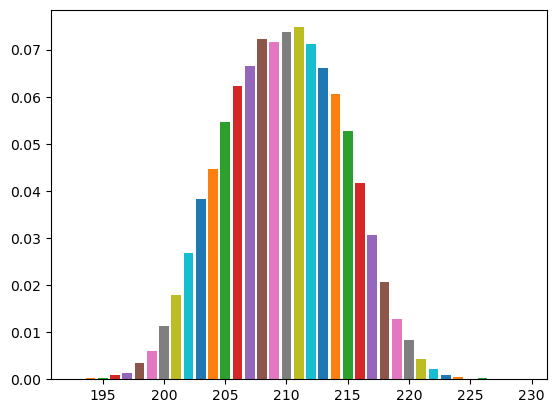

In [45]:
for col in names(freqs)
    bar(parse(Int, col), freqs[2, col])
end

In [58]:
function drawing()
    s = sample(names(freqs),  Weights(Array(freqs[2, :])))
    return parse(Int, s)
end

drawing (generic function with 1 method)

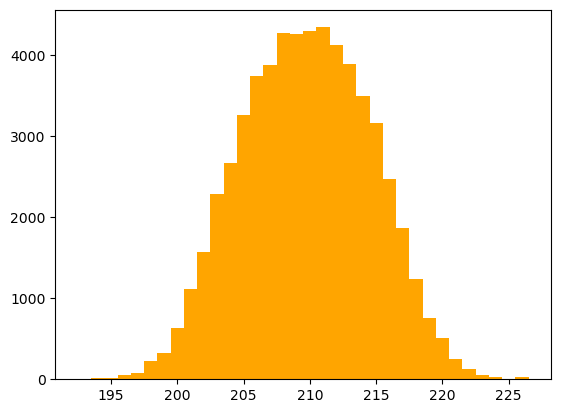

([4.0, 14.0, 14.0, 58.0, 82.0, 226.0, 328.0, 637.0, 1117.0, 1564.0  …  1862.0, 1230.0, 758.0, 509.0, 255.0, 126.0, 50.0, 25.0, 0.0, 24.0], [193.0, 194.0, 195.0, 196.0, 197.0, 198.0, 199.0, 200.0, 201.0, 202.0  …  218.0, 219.0, 220.0, 221.0, 222.0, 223.0, 224.0, 225.0, 226.0, 227.0], (PyObject <matplotlib.patches.Rectangle object at 0x7fe203774760>, PyObject <matplotlib.patches.Rectangle object at 0x7fe203774a30>, PyObject <matplotlib.patches.Rectangle object at 0x7fe203774070>, PyObject <matplotlib.patches.Rectangle object at 0x7fe2037fcf10>, PyObject <matplotlib.patches.Rectangle object at 0x7fe2037fcb20>, PyObject <matplotlib.patches.Rectangle object at 0x7fe2037fc2e0>, PyObject <matplotlib.patches.Rectangle object at 0x7fe2037fc640>, PyObject <matplotlib.patches.Rectangle object at 0x7fe2037fce80>, PyObject <matplotlib.patches.Rectangle object at 0x7fe2036b0e80>, PyObject <matplotlib.patches.Rectangle object at 0x7fe2036b0190>, PyObject <matplotlib.patches.Rectangle object at 0x7fe2

In [73]:
samples = [drawing() for i in 1:length(data.lidar)]
simulated = DataFrame(lidar=samples)
p = simulated.lidar
hist(p, bins= maximum(p)-minimum(p),
    align="left",color="orange")